<a href="https://colab.research.google.com/github/joohoshin/TensorflowAI/blob/main/11_1_%EC%84%B1%EB%8A%A5%ED%96%A5%EC%83%81%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

fasion mnist 정확도를 향상 시켜봅시다

In [1]:
import tensorflow as tf
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']               

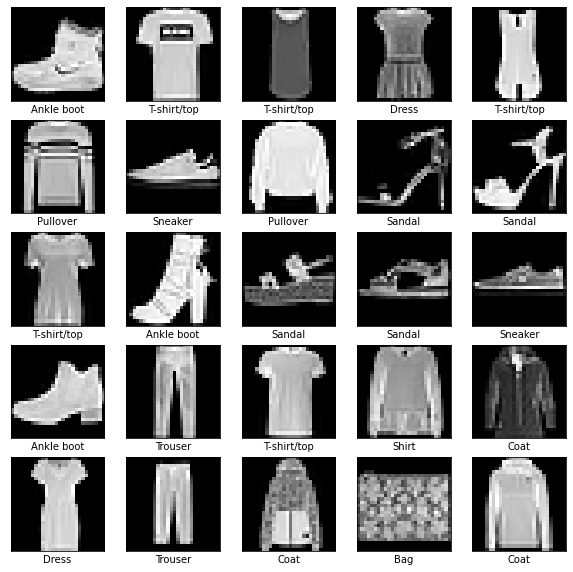

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(class_names[y_train[i]])
    
plt.show()

In [4]:
num_classes = 10

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

x_train = x_train/255
x_test = x_test/255

from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32,(5,5), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

epochs = 10
history = model.fit(x_train, y_train, batch_size=64,
          epochs=epochs, validation_data=(x_test, y_test))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              4719616   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 4,730,698
Trainable params: 4,730,698
Non-trainable params: 0
______________________________________________

In [5]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

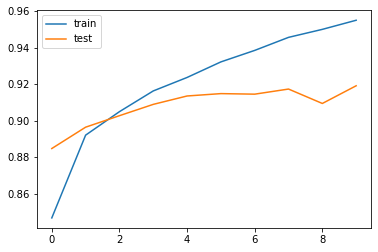

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['train', 'test'], loc='upper left')

In [7]:
y_pred = model.predict(x_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [8]:
y_pred.shape

(10000, 10)

In [9]:
y_pred = y_pred.argmax(axis = 1)

In [10]:
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [11]:
y_test.shape

(10000, 10)

In [12]:
y_true = y_test.argmax(axis = 1)

In [13]:
import pandas as pd 

df = pd.DataFrame({'true_y':y_true, 'pred_y':y_pred})

In [14]:
df

,true_y,pred_y
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6
...,...,...
9995,9,9
9996,1,1
9997,8,8
9998,1,1


In [15]:
df['wrong'] = df.true_y != df.pred_y

In [16]:
df[df['wrong']]

,true_y,pred_y,wrong
12,7,8,True
23,9,5,True
40,6,0,True
42,3,6,True
49,2,6,True
...,...,...,...
9961,6,2,True
9972,2,6,True
9977,6,0,True
9989,4,6,True


In [17]:
df['true_label'] = df.true_y.apply(lambda x: class_names[x])
df['pred_label'] = df.pred_y.apply(lambda x: class_names[x])

In [18]:
df

,true_y,pred_y,wrong,true_label,pred_label
0,9,9,False,Ankle boot,Ankle boot
1,2,2,False,Pullover,Pullover
2,1,1,False,Trouser,Trouser
3,1,1,False,Trouser,Trouser
4,6,6,False,Shirt,Shirt
...,...,...,...,...,...
9995,9,9,False,Ankle boot,Ankle boot
9996,1,1,False,Trouser,Trouser
9997,8,8,False,Bag,Bag
9998,1,1,False,Trouser,Trouser


In [19]:
wrong = df[df['wrong']]

In [20]:
wrong

,true_y,pred_y,wrong,true_label,pred_label
12,7,8,True,Sneaker,Bag
23,9,5,True,Ankle boot,Sandal
40,6,0,True,Shirt,T-shirt/top
42,3,6,True,Dress,Shirt
49,2,6,True,Pullover,Shirt
...,...,...,...,...,...
9961,6,2,True,Shirt,Pullover
9972,2,6,True,Pullover,Shirt
9977,6,0,True,Shirt,T-shirt/top
9989,4,6,True,Coat,Shirt


In [21]:
wrong.value_counts('true_label')

true_label
Shirt          235
Pullover       138
T-shirt/top    135
Coat           106
Dress           81
Ankle boot      37
Sandal          24
Trouser         19
Sneaker         18
Bag             16
dtype: int64

In [22]:
wrong.query('true_label=="Shirt"').value_counts('pred_label')

pred_label
T-shirt/top    91
Coat           61
Pullover       55
Dress          18
Bag             9
Trouser         1
dtype: int64

In [23]:
wrong.query('true_label=="Shirt" & pred_label == "T-shirt/top"')

,true_y,pred_y,wrong,true_label,pred_label
40,6,0,True,Shirt,T-shirt/top
344,6,0,True,Shirt,T-shirt/top
565,6,0,True,Shirt,T-shirt/top
572,6,0,True,Shirt,T-shirt/top
586,6,0,True,Shirt,T-shirt/top
...,...,...,...,...,...
9351,6,0,True,Shirt,T-shirt/top
9644,6,0,True,Shirt,T-shirt/top
9955,6,0,True,Shirt,T-shirt/top
9957,6,0,True,Shirt,T-shirt/top


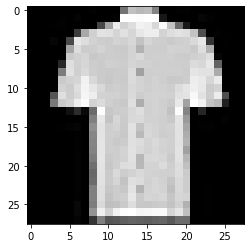

In [24]:
plt.imshow(x_test[40,:,:,0], cmap='gray')

In [25]:
class_names[y_test[40].argmax()]

'Shirt'

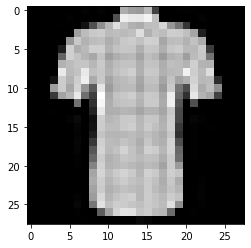

In [26]:
plt.imshow(x_test[586,:,:,0], cmap='gray')